# This is to get the final training and testing sets. 
The core here is data consistency: have all the estimates and their uncertainities; make sure the data has been standardized properly etc.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io.misc.hdf5 import write_table_hdf5
import matplotlib.pyplot as plt

In [2]:
dataAll = Table.read('../data/7dot39_cut_APOGEE_DR16_EDR3.fits')

Step 1 is the training set. We are selecting only stars with SNR > 100 as our training set. We also make sure that the RC stars with mass greater than 1.8 solar masses are chosen. RGB stars with R < 11 R sun and RC stars with M > 1.2 M_sun.

In [3]:
mask = ((dataAll['age']>=0) & (dataAll['age']<=20) & (dataAll['SNR']>=100))
dataAll = dataAll[mask]

In [4]:
len(dataAll) #3026 stars in this case 

3026

In [5]:
nstars   = len(dataAll)  

print("The number of stars in the full sample sample is:")
print(nstars) 

index  = dataAll['age']>=0
print("Found "+str(np.sum(index))+" stars with positive ages")
dataAge = dataAll[:][index]

index_g = dataAge['phot_g_mean_flux']>=0
print("Found "+str(np.sum(index_g))+" stars with good g fluxes")
dataAge = dataAge[:][index_g]

index_bp = dataAge['phot_bp_mean_flux']>=0
print("Found "+str(np.sum(index_bp))+" stars with good bp fluxes")
dataAge = dataAge[:][index_bp]

index_rp = dataAge['phot_rp_mean_flux']>=0
print("Found "+str(np.sum(index_rp))+" stars with good rp fluxes")
dataAge = dataAge[:][index_rp]

index_jerr = dataAge['J_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good J err values")
dataAge = dataAge[:][index_jerr]

index_jerr = dataAge['H_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good H err values")
dataAge = dataAge[:][index_jerr]

index_jerr = dataAge['K_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good K err values")
data = dataAge[:][index_jerr]

The number of stars in the full sample sample is:
3026
Found 3026 stars with positive ages
Found 3026 stars with good g fluxes
Found 3026 stars with good bp fluxes
Found 3026 stars with good rp fluxes
Found 3022 stars with good J err values
Found 3019 stars with good H err values
Found 3016 stars with good K err values


In [6]:
# Get the final features: logg, teff, alpham, mh, cfe, nfe, gmag, bpmag, rpmag, j, h, k & their errors
# Get the final targets: age and distance and their errors

g_mag = data['phot_g_mean_mag']
g_flux = data['phot_g_mean_flux']
g_flux_error = data['phot_g_mean_flux_error']
gmagErr = 0.5 * 2.5 * (np.log10(g_flux + g_flux_error) - np.log10(g_flux - g_flux_error ))

bp_mag = data['phot_bp_mean_mag']
bp_flux = data['phot_bp_mean_flux']
bp_flux_error = data['phot_bp_mean_flux_error']
bpmagErr = 0.5 * 2.5 * (np.log10(bp_flux + bp_flux_error) - np.log10(bp_flux - bp_flux_error ))

rp_mag = data['phot_rp_mean_mag']
rp_flux = data['phot_rp_mean_flux']
rp_flux_error = data['phot_rp_mean_flux_error']
rpmagErr = 0.5 * 2.5 * (np.log10(rp_flux + rp_flux_error) - np.log10(rp_flux - rp_flux_error ))

data['G'] = g_mag
data['G_ERR'] = gmagErr

data['BP'] = bp_mag
data['BP_ERR'] = bpmagErr

data['RP'] = rp_mag
data['RP_ERR'] = rpmagErr

In [7]:
# Target 1: age and age uncertainty
age = data['age']
age_68u = data['age_68U']
age_68l = data['age_68L']
ageErr = (age_68u - age_68l)/2.0
data['ageErr'] = ageErr

logAge = np.log10(age)
logAgeErr = (np.log10(age_68u) - np.log10(age_68l))/2.0

data['logAge'] = logAge
data['logAgeErr'] = logAgeErr

3016

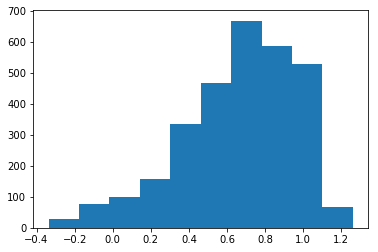

In [8]:
plt.hist(logAge)
len(logAge)

In [9]:
dist = data['dist']
dist_68u = data['dist_68U']
dist_68l = data['dist_68L']
dist_err = (dist_68u - dist_68l)/2.0

# This is distance in kpc
# Make sure you change this in the distance modulus

dist_kpc = dist/1000
logDistKpc = np.log10(dist_kpc)

dist_68u_kpc = dist_68u/1000
dist_68l_kpc = dist_68l/1000
dist_kpc_err = dist_err/1000

logDistKpcErr = (np.log10(dist_68u_kpc) - np.log10(dist_68l_kpc))/2.0

data['distKpc'] = dist_kpc
data['distKpc_68U'] = dist_68u_kpc
data['distKpc_68L'] = dist_68l_kpc
data['distErrKpc'] = dist_kpc_err

# Get the log(distance) error
# Also make sure you save an APOGEE id etc. Done

data['logDistKpc'] = logDistKpc
data['logDistKpcErr'] = logDistKpcErr

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [10]:
feats = ['APOGEE_ID', 'source_id', 'LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K', 'LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR', \
           'age', 'age_68U', 'age_68L', 'ageErr', 'logAge', 'logAgeErr', \
           'distKpc', 'distKpc_68U','distKpc_68L', 'distErrKpc', 'logDistKpc', 'logDistKpcErr']

dataOfInterest = data[feats]

In [11]:
dataOfInterest

APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,BP,RP,J,H,K,LOGG_ERR,TEFF_ERR,ALPHA_M_ERR,M_H_ERR,C_FE_ERR,N_FE_ERR,G_ERR,BP_ERR,RP_ERR,J_ERR,H_ERR,K_ERR,age,age_68U,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68U,distKpc_68L,distErrKpc,logDistKpc,logDistKpcErr
bytes18,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2M18401969+4348380,2117126509915136384,2.8711064,4723.436,0.01086,0.06699445,-0.016018,0.197207,11.753538,12.318904,11.045187,10.137,9.571,9.467,0.058637943,81.75099,0.006152249,0.006008434,0.008847789,0.014188407,0.00015301766796649297,0.0006162408071208603,0.00034655273960959576,0.027,0.032,0.02,8.452,10.8035,6.8391,1.9821999999999997,0.9269594883802758,0.09928276115938284,0.9995381,1.0150514,0.9849178000000001,0.015066799999999944,-0.0002006469641756818,0.006544024098467232
2M18405556+4353012,2117149874537225344,3.000676,4952.733,0.017616,-0.16899155,-0.012749001,0.20245,12.680544,13.187252,12.014052,11.207,10.655,10.578,0.06626931,90.44813,0.0076395846,0.0072800093,0.013481049,0.020665647,0.0002076943814155463,0.0009715401669507795,0.00030428009016869595,0.026,0.032,0.02,3.5835,4.5109,2.8510000000000004,0.82995,0.5543074088055591,0.09963299111341473,1.7527549,1.7802525,1.7268314,0.026710550000000013,0.24372118989888159,0.006615833614809635
2M18410298+4315506,2116830779945635200,2.9010854,5117.8726,-0.0428217,-0.00211645,-0.1041679,0.3720321,11.452943,11.927316,10.815545,10.036,9.564,9.484,0.05514146,104.51944,0.008673798,0.008951051,0.016361201,0.024654208,0.0001972115077164549,0.0005618522932848702,0.00037555199628114266,0.024,0.031,0.021,0.5005,0.5726,0.4732,0.049699999999999994,-0.3005959181846626,0.04140330386484353,1.645128,1.6576175,1.6315483,0.013034600000000068,0.21619969409817283,0.00344219400113438
2M18413176+4358551,2116969387130311040,3.1805131,4796.577,-0.010190001,0.19212845,0.041309997,0.29672,12.788189,13.337189,12.094188,11.198,10.71,10.572,0.057402786,84.56154,0.0060115494,0.0059961583,0.008783365,0.014018694,0.000196806732689625,0.0007612166681070232,0.00029357923337691716,0.022,0.031,0.02,6.9911,8.8075,5.6442,1.5816499999999998,0.8445455142785693,0.0966251287223509,1.1736595,1.1901355,1.154782,0.017676750000000085,0.06954211844485043,0.006548201998855405
2M18420846+4315092,2116909291947572736,3.0398765,4725.525,0.05975,0.15459844,0.13375999,0.21505,11.997146,12.540438,11.308423,10.411,9.868,9.793,0.054576788,94.63482,0.0073105795,0.007685421,0.01106545,0.01701269,0.00015616878414337343,0.0006605377856638839,0.0003453686888155172,0.025,0.018,0.011,9.613999999999999,12.1627,7.7625,2.2000999999999995,0.982904117792628,0.09751419078307944,0.8492534,0.8606592000000001,0.8365657,0.012046750000000031,-0.07096270574932956,0.0061655806895158025
2M18421097+4331424,2116931552759508992,2.7449327,4650.347,0.073969,-0.00354575,0.0838808,0.15268481,12.409217,12.985454,11.690904,10.72,10.17,10.077,0.058624983,80.34939,0.006312234,0.0061451127,0.008839405,0.014256706,0.00014679030723163677,0.0006019032513826517,0.0002754958040274147,0.021,0.021,0.011,10.3321,12.7516,8.0353,2.35815,1.0141886008731362,0.10028129257584928,1.3185384,1.3381462,1.2997207000000002,0.019212749999999914,0.12009278233973802,0.006326764678110074
2M18421171+4401098,2116968356338186880,2.9857416,4844.4946,0.032383002,-0.06448255,0.024093002,0.14346501,12.9262295,13.468918,12.235011,11.283,10.808,10.704,0.061752915,90.38035,0.0073827514,0.0072294995,0.012188949,0.018733373,0.0001711704055562535,0.0006965400378622366,0.000564075486865212,0.02,0.017,0.011,5.4905,7.0317,4.4157,1.3079999999999998,0.7396118958805553,0.10103038686559201,1.7490899999999998,1.776172,1.7231768,0.026497600000000034,0.24281215681872773,0.006577590294996966
2M18421481+4740382,2119807187982756096,3.0432184,4899.9116,

In [12]:
dataOfInterest.write('AllOriginal.csv', overwrite=True)